### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Sobre o desafio

Vamos praticar o que foi apresentado na aula a partir de algumas atividades, porém usando um conjunto de dados diferente do apresentado na aula. O tema da base de dados é a de churn de clientes. O churn é uma métrica que indica os clientes que cancelam o serviço em determinado período de tempo.

# Aula 1

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos. Além disso, remova a coluna 'id_cliente', uma vez que esse tipo de informação única para cada linha não é útil para uso em modelos de machine learning.

In [1]:
import pandas as pd

data = pd.read_csv('./churn.csv')
# dropping the entire column id_cliente
data = data.drop('id_cliente', axis=1)
data.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Resultado:** das 10000 entradas na base de dados, nenhuma é nula.

### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [3]:
import plotly.express as px

categorical = ['pais', 'sexo_biologico', 'tem_cartao_credito', 'membro_ativo']
# using show() to display the plot for every iteration, without overlay
for category in categorical:
    px.histogram(data, x=category, color='churn', text_auto=True).show()

Verificando se `score_credito` deveria ser tratado como dado categórico. Como há 460 valores distintos, acredito que podemos tratá-lo como numérico mesmo.

In [4]:
print(data['score_credito'].describe())
print(f'Number of unique elements: {data.score_credito.nunique()}')

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score_credito, dtype: float64
Number of unique elements: 460


Plotando também o gráfico para a variável alvo.

In [5]:
px.histogram(data, x='churn', text_auto=True)

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [6]:
numericals = ['score_credito','idade','anos_de_cliente','saldo','servicos_adquiridos','salario_estimado']

for numerical in numericals:
    px.box(data, x=numerical, color='churn').show()

O boxplot da variável `servicos_adquiridos` não ficou tão interessante visualmente, então também vou plotar o histograma, para verificar se conseguimos ter uma análise visual melhor: 

In [7]:
px.histogram(data, x='servicos_adquiridos', color='churn', text_auto=True)

De acordo com os gráficos, os dados parecem estar consistentes, sem valores que fogem de um padrão "normal" (nenhuma idade negativa, por exemplo).

# Aula 2

### Desafio 1:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [8]:
import pandas as pd

data = pd.read_csv('./churn.csv')
data.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# dropping unwanted variable and target variable
x = data.drop(['id_cliente', 'churn'], axis=1)

y = data['churn']

In [10]:
x.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

### Desafio 2:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# features 'tem_cartao_credito' and 'membro_ativo' are already encoded
# 'sexo_biologico' has a binary output
categories_to_encode = ['pais', 'sexo_biologico']
cols = x.columns

# create the transformer
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categories_to_encode),
    remainder='passthrough',
    sparse_threshold=0
)

In [13]:
# apply transformer
x = one_hot.fit_transform(x)

# convert it back to a Dataframe
x = pd.DataFrame(x, columns=one_hot.get_feature_names_out(cols))
x.head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,1.0,1.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,1.0,1.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,0.0,1.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


### Desafio 3:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [14]:
# y is already 0/1, no encoding needed
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

# Aula 3

### Desafio 1:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [15]:
from sklearn.model_selection import train_test_split

# stratifying by the data in y
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

print(x_train.shape, len(y_train), x_test.shape, len(y_test))

(7500, 12) 7500 (2500, 12) 2500


### Desafio 2:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [16]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)

0.7964

Curiosamente, o modelo dummy obteve um score bem alto. Provavelmente porque, no conjunto de dados, a frequência de churn = 0 é de 75%.

### Desafio 3:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_test, y_test)
tree.score(x_test, y_test)

0.8488

O score obtido foi ainda mais alto do que o do dummy. Verificando também como o modelo se sai com os dados de treinamento:

In [18]:
tree.score(x_train, y_train)

0.8476

Visualizando a árvore gerada pelo modelo:

In [19]:
cols_names = [
    'pais_Alemanha',
    'pais_Espanha',
    'pais_França',
    'sexo_biologico_Mulher',
    'score_credito',
    'idade',
    'anos_de_cliente',
    'saldo',
    'servicos_adquiridos',
    'tem_cartao_credito',
    'membro_ativo',
    'salario_estimado'
]

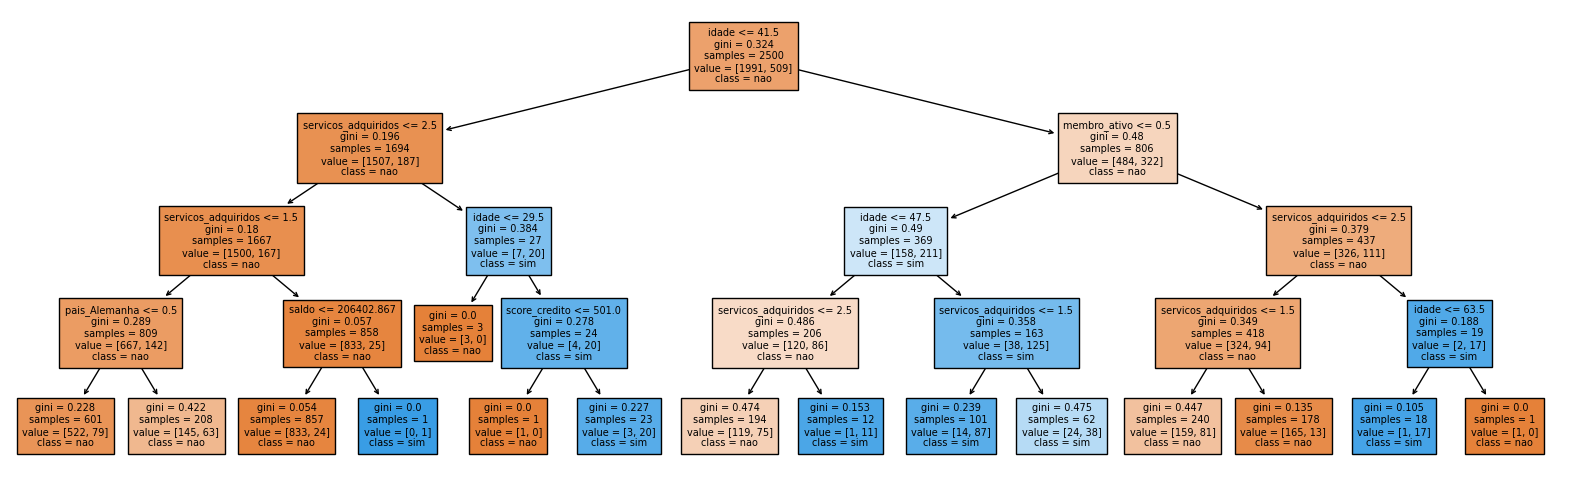

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# using the names created by the transformer
# assuming 0=nao and 1=sim in classnames
plot_tree(tree, filled=True, class_names=['nao', 'sim'], feature_names=cols_names, fontsize=7);

# Aula 4

### Desafio 1:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fitting the scaler with x_train data
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [22]:
x_train.head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
5889,0.0,0.0,1.0,1.0,727.0,31.0,2.0,52192.08,2.0,0.0,1.0,160383.47
7495,0.0,0.0,1.0,1.0,557.0,27.0,2.0,0.00,2.0,0.0,1.0,4497.55
1483,0.0,0.0,1.0,0.0,850.0,36.0,1.0,104077.19,2.0,0.0,1.0,68594.00
1532,1.0,0.0,0.0,1.0,661.0,32.0,1.0,145980.23,1.0,0.0,1.0,56636.28
3616,0.0,0.0,1.0,1.0,798.0,60.0,6.0,96956.10,1.0,1.0,0.0,31907.44


In [23]:
pd.DataFrame(x_train_norm, columns=x_train.columns).head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,0.754,0.175676,0.2,0.208021,0.333333,0.0,1.0,0.801936
1,0.0,0.0,1.0,1.0,0.414,0.121622,0.2,0.000000,0.333333,0.0,1.0,0.022432
2,0.0,0.0,1.0,0.0,1.000,0.243243,0.1,0.414819,0.333333,0.0,1.0,0.342945
3,1.0,0.0,0.0,1.0,0.622,0.189189,0.1,0.581831,0.000000,0.0,1.0,0.283151
4,0.0,0.0,1.0,1.0,0.896,0.567568,0.6,0.386436,0.000000,1.0,0.0,0.159495


In [24]:
x_test.head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
7646,0.0,1.0,0.0,0.0,566.0,32.0,10.0,147511.26,1.0,1.0,1.0,159891.03
8553,0.0,1.0,0.0,1.0,682.0,58.0,4.0,0.00,1.0,1.0,0.0,176036.01
5463,0.0,0.0,1.0,1.0,731.0,36.0,6.0,0.00,1.0,0.0,0.0,152128.36
7926,0.0,1.0,0.0,1.0,567.0,54.0,5.0,92316.31,2.0,1.0,0.0,158590.66
6102,0.0,1.0,0.0,1.0,642.0,36.0,6.0,0.00,2.0,1.0,1.0,97938.59


In [25]:
pd.DataFrame(x_test_norm, columns=x_test.columns).head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,1.0,0.0,0.0,0.432,0.189189,1.0,0.587933,0.000000,1.0,1.0,0.799474
1,0.0,1.0,0.0,1.0,0.664,0.540541,0.4,0.000000,0.000000,1.0,0.0,0.880206
2,0.0,0.0,1.0,1.0,0.762,0.243243,0.6,0.000000,0.000000,0.0,0.0,0.760657
3,0.0,1.0,0.0,1.0,0.434,0.486486,0.5,0.367943,0.333333,1.0,0.0,0.792971
4,0.0,1.0,0.0,1.0,0.584,0.243243,0.6,0.000000,0.333333,1.0,1.0,0.489682


### Desafio 2:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_norm, y_train)
knn.score(x_test_norm, y_test)

0.8184

### Desafio 3:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [27]:
print('--- Score by model ---')
print(f'Dummy:\t{dummy.score(x_test, y_test)}')
print(f'Decision tree:\t{tree.score(x_test, y_test)}')
print(f'KNN:\t{knn.score(x_test_norm, y_test)}')

--- Score by model ---
Dummy:	0.7964
Decision tree:	0.8488
KNN:	0.8184


Pelo score, a árvore de decisão é o modelo que tem o melhor desempenho. Tanto ela quanto o one-hot encoder serão salvos em arquivos pickle.

In [28]:
import pickle

with open('desafio_encoder.pkl', 'wb') as data_file:
    pickle.dump(one_hot, data_file)

with open('desafio_tree_model.pkl', 'wb') as data_file:
    pickle.dump(tree, data_file)

### Desafio 4:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```


In [29]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [1],
    'salario_estimado': [85270.00]
})

novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,1,1,85270.0


In [30]:
encoder_from_file = pd.read_pickle('./desafio_encoder.pkl')
model_from_file = pd.read_pickle('./desafio_tree_model.pkl')

In [31]:
novo_dado = encoder_from_file.transform(novo_dado)
novo_dado

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 8.500e+02, 2.700e+01,
        3.000e+00, 5.600e+04, 1.000e+00, 1.000e+00, 1.000e+00, 8.527e+04]])

In [32]:
model_from_file.predict(novo_dado)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0], dtype=int64)

O warning acima informa que o modelo foi treinado com nomes para as colunas. Se quisermos evitar o warning, devemos criar um dataframe e passar os mesmos nomes de colunas utilizadas no modelo. Ou então, devemos treinar o modelo sem nomes para as colunas.

In [33]:
novo_dado = pd.DataFrame(novo_dado, columns = x_train.columns)
novo_dado.head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,0.0,1.0,0.0,850.0,27.0,3.0,56000.0,1.0,1.0,1.0,85270.0


In [34]:
model_from_file.predict(novo_dado)

array([0], dtype=int64)

De acordo com a previsão do modelo, o churn é 0 para este cliente, o que indica que ele provavelmente não irá cancelar o serviço.